In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df_crypto = pd.read_csv("crypto_data.csv")
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
is_true_df = df_crypto[df_crypto["IsTrading"] == True]
is_true_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
is_true_no_trading_info = is_true_df.drop('IsTrading', axis=1)

In [5]:
is_true_no_na = is_true_no_trading_info.dropna()

In [6]:
has_mined = is_true_no_na[is_true_no_na["TotalCoinsMined"] > 0]

In [7]:
no_coin_name = has_mined.drop('CoinName', axis=1)

In [8]:
with_dummies = pd.get_dummies(no_coin_name)
with_dummies

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaled_final_df = StandardScaler().fit_transform(with_dummies)

In [10]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_final_df)
len(crypto_pca)
#number "columns 441"

532

In [11]:
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-2.567847e-15,-1.442737e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,-0.000000e+00,5.917241e-16,2.215320e-19,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.286779,-0.135378,7.433740e-16,-1.797819e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-4.601236e-15,1.302178e-14,8.279457e-16,-1.057281e-16,2.506556e-15,-1.486817e-16,3.566022e-15,2.475690e-15,-2.655374e-15,-7.564581e-17
2,0.361159,-0.003304,-3.210345e-15,-4.534394e-16,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-2.314599e-15,-4.859521e-15,-9.131104e-15,-1.002232e-15,2.611704e-15,-5.347171e-15,-1.001093e-15,1.807247e-16,-3.782215e-15,5.188829e-16
3,-0.287881,-0.256431,-7.425722e-15,-3.300552e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-1.822688e+00,2.974025e-01,1.073856e+00,-1.048815e+00,8.321595e-01,2.721860e+00,1.162514e+00,-2.000870e+00,1.125042e+00,-1.392129e+00
4,-0.136884,-0.256819,-8.191243e-15,-3.557103e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-1.704392e+00,-1.163227e+00,1.154593e+00,-8.650385e-01,-6.539892e-01,-1.586896e+00,1.537657e+00,-1.147037e+00,-1.239488e-01,2.543553e+00


In [12]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_crypto_pca)

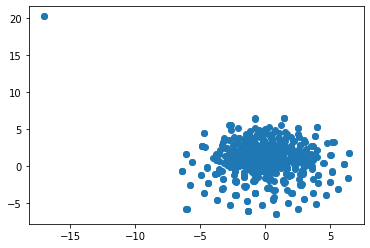

In [13]:
df_crypto_pca['x'] = tsne_features[:,0]
df_crypto_pca['y'] = tsne_features[:,1]
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

C:\Users\esthe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


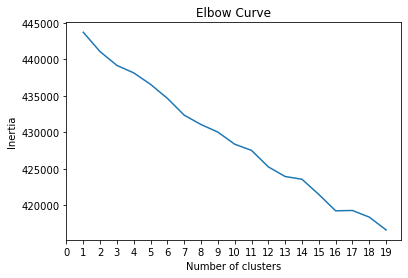

In [14]:
inertia = []
k = list(range(1,20))

for i in k:
    km = KMeans(n_clusters=i, random_state = 0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on both the graph generated sing TSNE and the elbow curve's lack of a disernable bend, it can be seen that cryptocurrency cannot be in placed in multiple clusters.